In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import petrolib

In [2]:
from pathlib import Path
from petrolib import procs
from petrolib import file_reader as fr
from petrolib.workflow import Quanti
from petrolib.plots import tripleCombo, Zonation, plotLog
#from petrolib.file_reader import load_las
import lasio

EBD4 = lasio.read("Documents/Yinka's PHD data/E-BD4.las")

well4 = EBD4.df()

well4.head()

well4.describe()

well4.to_csv('E-BD4.csv')

In [6]:
well4 = pd.read_csv("Documents/Yinka's PHD data/E-BD4.csv", header=0)

In [7]:
well4

,DEPTH,GR,HLLD,RHOZ,TNPH,DT
0,0.0000,NaN,NaN,NaN,NaN,NaN
1,0.1524,NaN,NaN,NaN,NaN,NaN
2,0.3048,NaN,NaN,NaN,NaN,NaN
3,0.4572,NaN,NaN,NaN,NaN,NaN
4,0.6096,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19681,2999.3844,NaN,NaN,NaN,NaN,NaN
19682,2999.5368,NaN,NaN,NaN,NaN,NaN
19683,2999.6892,NaN,NaN,NaN,NaN,NaN
19684,2999.8416,NaN,NaN,NaN,NaN,NaN


In [17]:
well4.describe()

,DEPTH,GR,HLLD,RHOZ,TNPH,DT
count,19686.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,1499.997000,77.400200,731.500563,1.410016,0.194165,409.468377
std,866.089663,24.499607,6434.632797,34.104463,0.059463,228.358710
min,0.000000,12.801600,-999.250000,-999.250000,0.025600,91.595200
25%,749.998500,60.805300,3.504900,2.434400,0.158700,159.445000
50%,1499.997000,78.483700,5.229600,2.533700,0.191700,356.749100
75%,2249.995500,94.837800,7.947500,2.592750,0.218200,667.081100
max,2999.994000,175.615700,60000.000000,4.628800,0.736900,746.353500


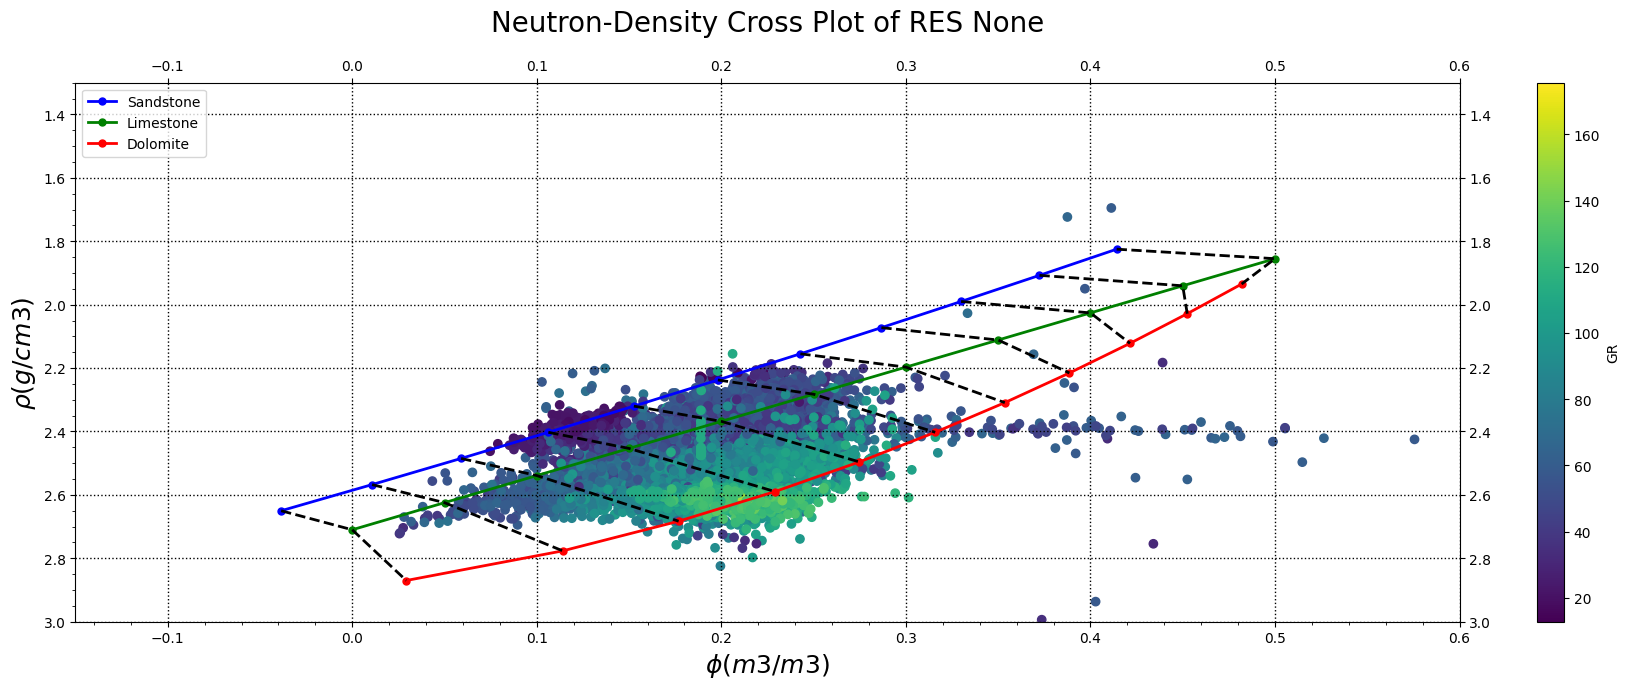

In [9]:
from petrolib.interp import crossPlot
crossPlot(well4, column_x='TNPH', column_y='RHOZ', color_code='num', hue='GR')

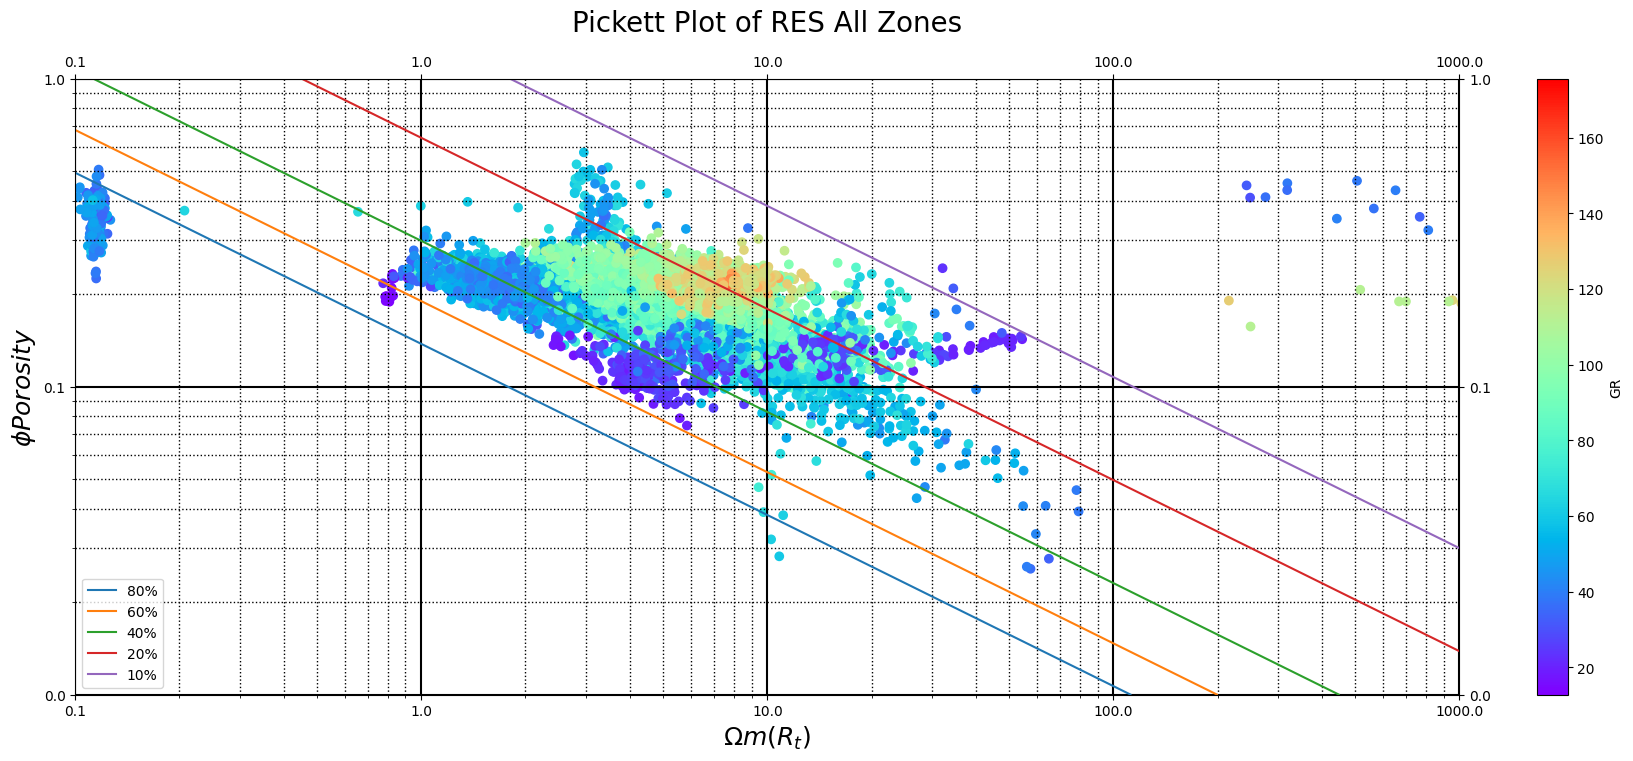

In [10]:
from petrolib.interp import picketPlot
picketPlot(well4, rt='HLLD', por='TNPH',res_name='All Zones', color_code='num', hue='GR', cmap='rainbow')

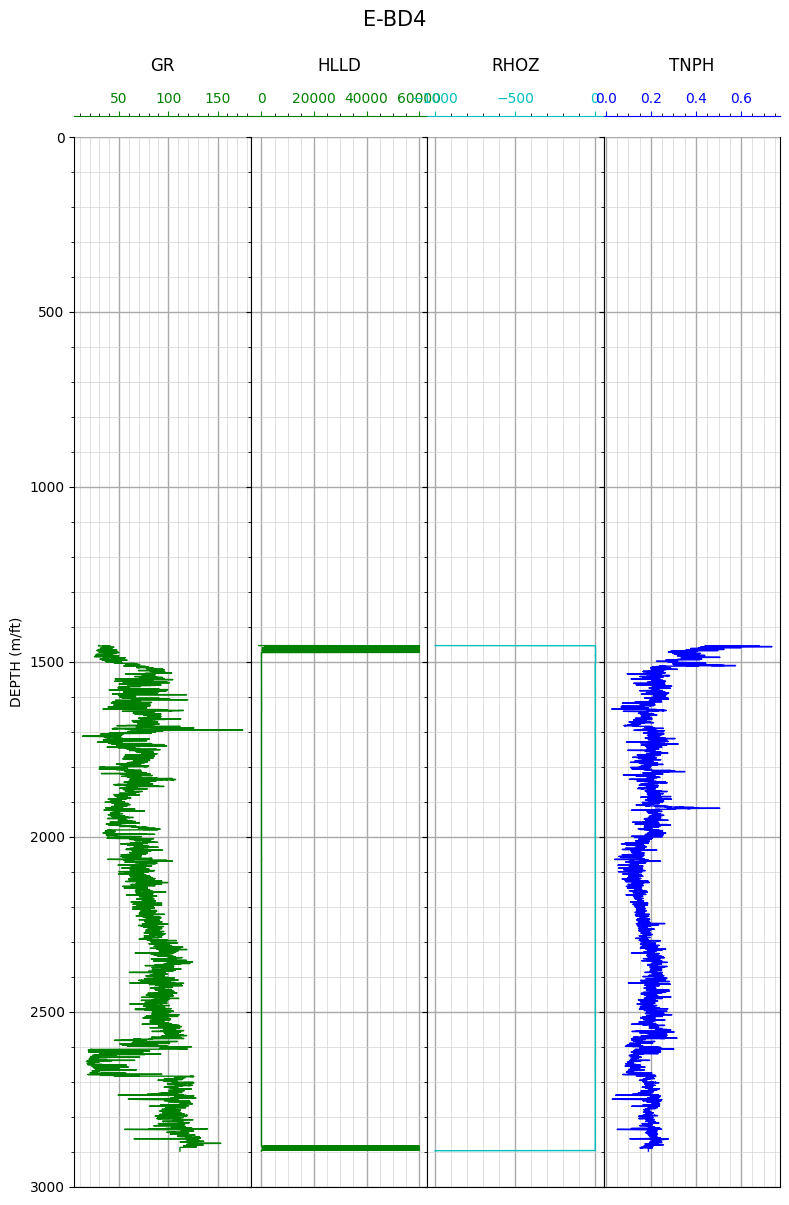

In [18]:
plotLog(well4,"DEPTH",['GR', 'HLLD', 'RHOZ', 'TNPH'], 0, 3000, 'E-BD4')

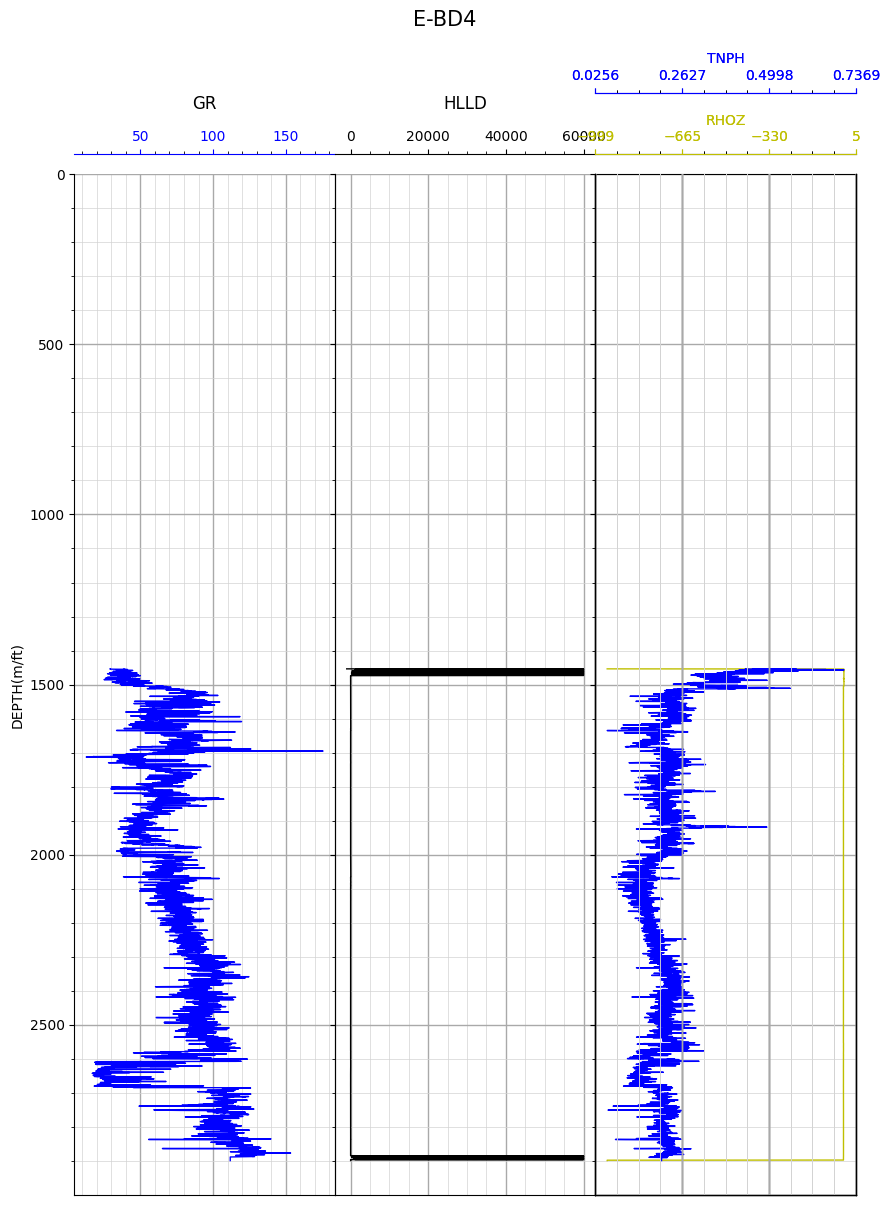

In [16]:
from petrolib.plots import plotLogs
plotLogs(well4, 'DEPTH', ['GR', 'HLLD', ['RHOZ', 'TNPH']], top=well4.DEPTH.min(),
                       bottom=well4.DEPTH.max(), figsize=(9, 12), title='E-BD4')

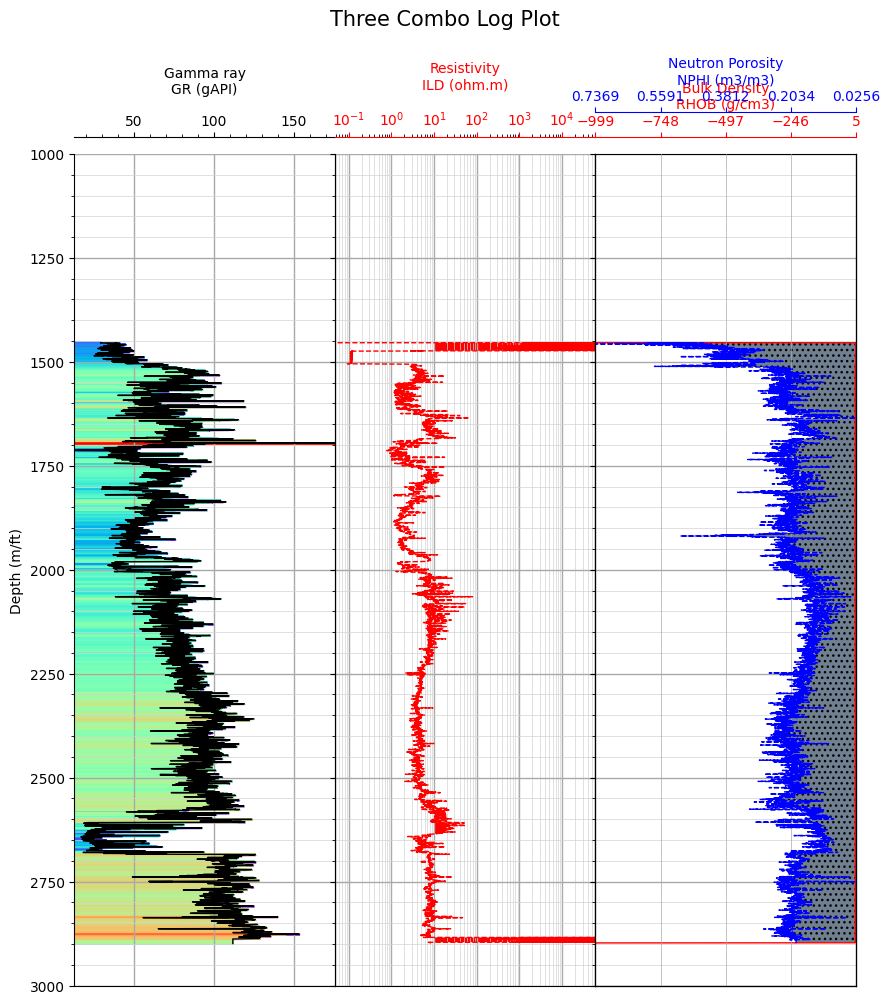

In [19]:
tripleCombo(well4, 'DEPTH', 'GR', 'HLLD', 'TNPH', 'RHOZ', ztop=1000,
                    zbot=3000, res_thres=10, fill='right', palette_op='rainbow', limit='left')

In [20]:
from petrolib.procs import model_facies
model_facies(well4, gr='GR', env='SS')

,DEPTH,GR,HLLD,RHOZ,TNPH,DT,litho
0,0.0000,NaN,NaN,NaN,NaN,NaN,Shale
1,0.1524,NaN,NaN,NaN,NaN,NaN,Shale
2,0.3048,NaN,NaN,NaN,NaN,NaN,Shale
3,0.4572,NaN,NaN,NaN,NaN,NaN,Shale
4,0.6096,NaN,NaN,NaN,NaN,NaN,Shale
...,...,...,...,...,...,...,...
19681,2999.3844,NaN,NaN,NaN,NaN,NaN,Shale
19682,2999.5368,NaN,NaN,NaN,NaN,NaN,Shale
19683,2999.6892,NaN,NaN,NaN,NaN,NaN,Shale
19684,2999.8416,NaN,NaN,NaN,NaN,NaN,Shale


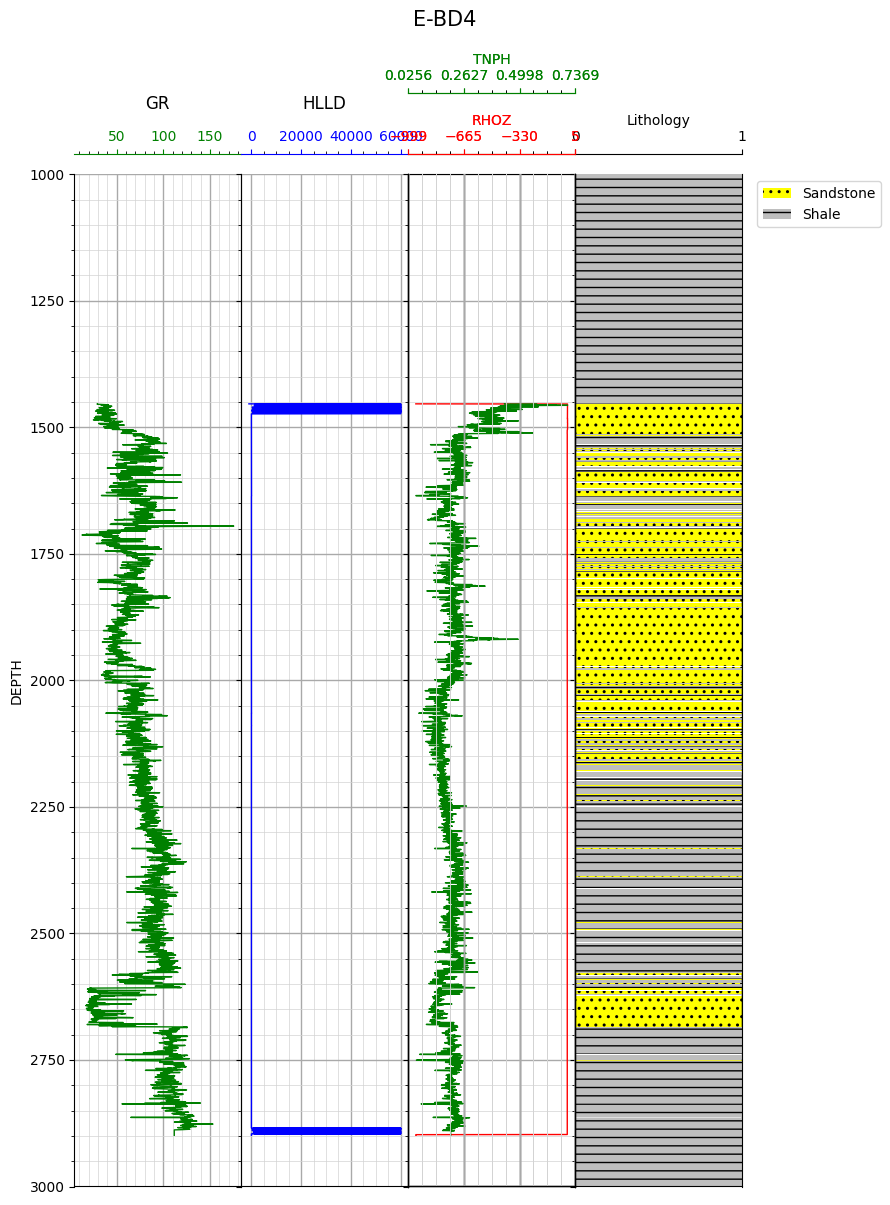

In [21]:
from petrolib.plots import plotLogFacies
plotLogFacies(well4, 'DEPTH', ['GR', 'HLLD', ['RHOZ', 'TNPH']], facies='litho', top=1000.0,
                        bottom=3000.0, figsize=(9, 12), title='E-BD4')

In [22]:
from petrolib.procs import process_data
well5 = process_data(well4, 'GR', 'HLLD', 'TNPH', 'RHOZ')
well5.describe()

,DEPTH,GR,HLLD,RHOZ,TNPH,DT
count,19686.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,1499.997000,77.396076,44.826740,2.519309,0.193733,409.468377
std,866.089663,24.485793,268.827875,0.132939,0.057107,228.358710
min,0.000000,12.801600,0.200000,1.950000,0.025600,91.595200
25%,749.998500,60.805300,3.504900,2.434400,0.158700,159.445000
50%,1499.997000,78.483700,5.229600,2.533700,0.191700,356.749100
75%,2249.995500,94.837800,7.947500,2.592750,0.218200,667.081100
max,2999.994000,150.000000,2000.000000,2.950000,0.450000,746.353500


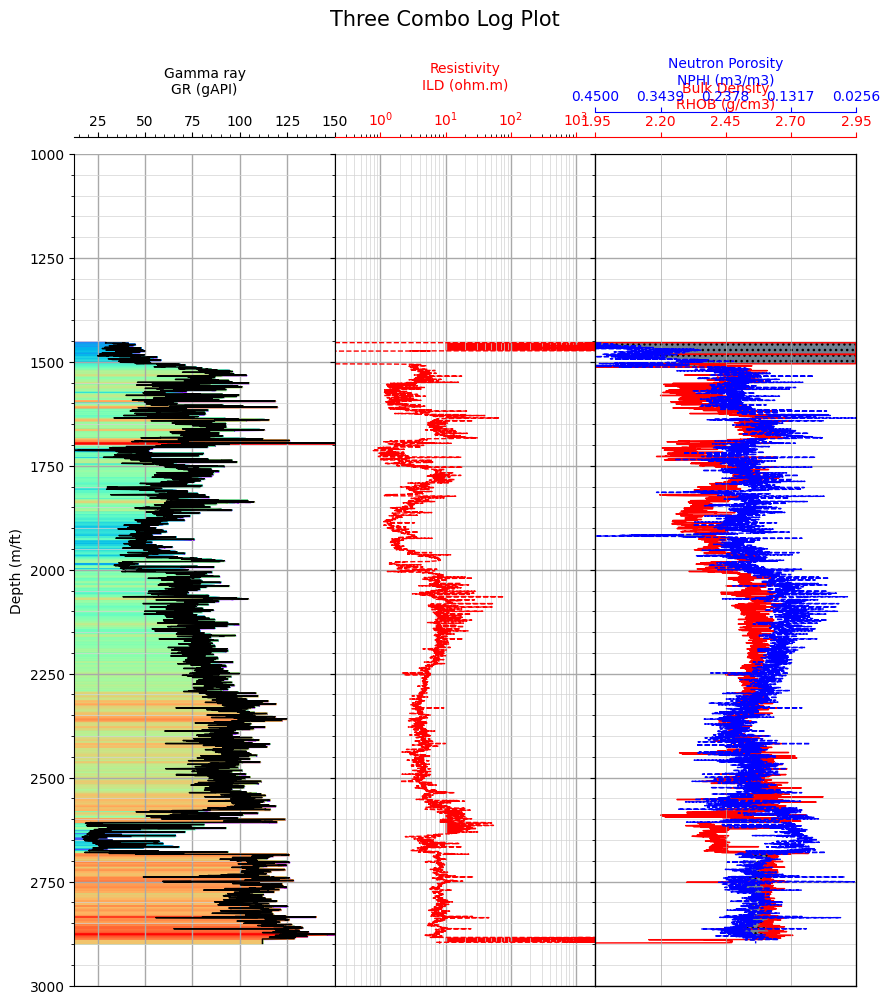

In [23]:
tripleCombo(well5, 'DEPTH', 'GR', 'HLLD', 'TNPH', 'RHOZ', ztop=1000,
                    zbot=3000, res_thres=10, fill='right', palette_op='rainbow', limit='left')

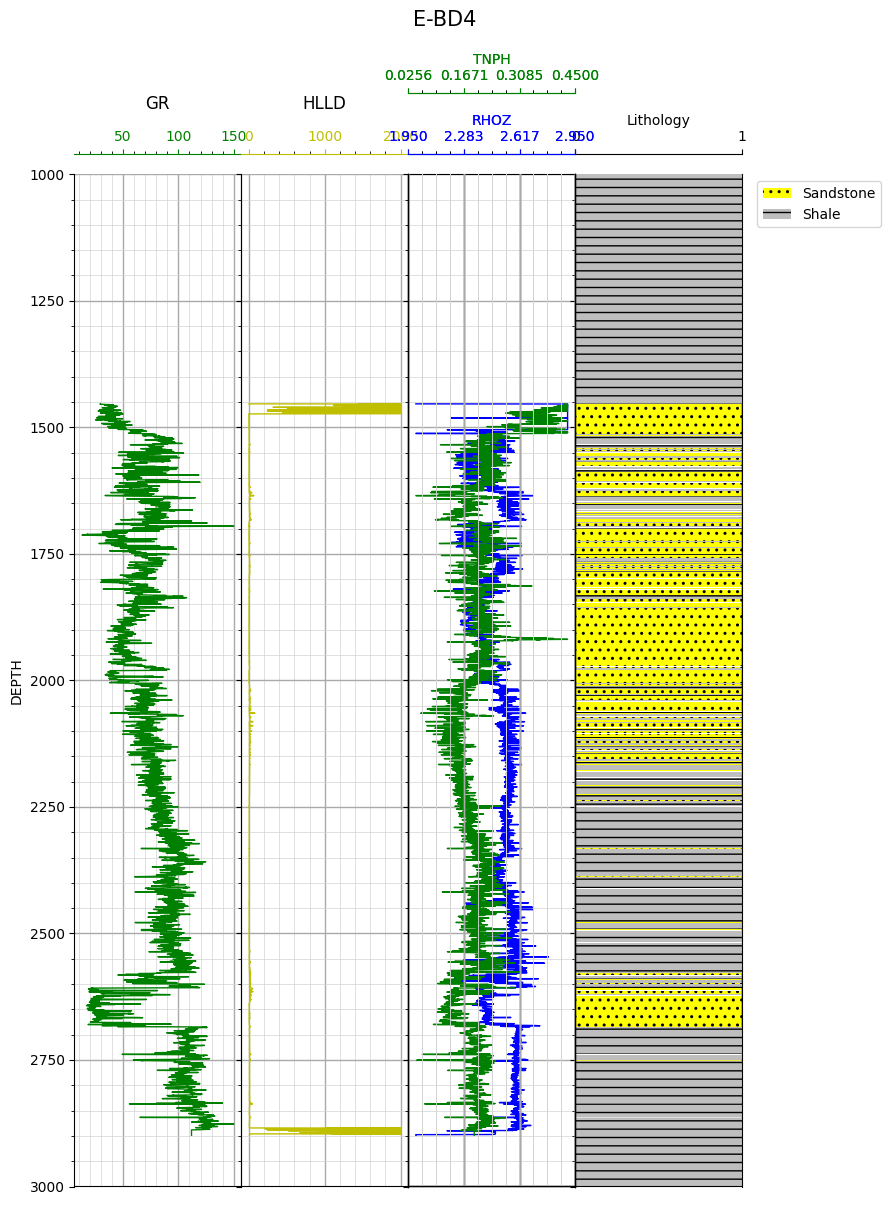

In [25]:
from petrolib.plots import plotLogFacies
plotLogFacies(well5, 'DEPTH', ['GR', 'HLLD', ['RHOZ', 'TNPH']], facies='litho', top=1000.0,
                        bottom=3000.0, figsize=(9, 12), title='E-BD4')

In [26]:
from petrolib.procs import set_alias
well5 = set_alias(well5, 'DEPTH', 'GR','HLLD', 'TNPH', 'RHOZ')
print(well5.columns)

Index(['DEPTH', 'GR', 'RT', 'RHOB', 'NPHI', 'DT', 'litho'], dtype='object')


In [27]:
well5.describe()

,DEPTH,GR,RT,RHOB,NPHI,DT
count,19686.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,1499.997000,77.396076,44.826740,2.519309,0.193733,409.468377
std,866.089663,24.485793,268.827875,0.132939,0.057107,228.358710
min,0.000000,12.801600,0.200000,1.950000,0.025600,91.595200
25%,749.998500,60.805300,3.504900,2.434400,0.158700,159.445000
50%,1499.997000,78.483700,5.229600,2.533700,0.191700,356.749100
75%,2249.995500,94.837800,7.947500,2.592750,0.218200,667.081100
max,2999.994000,150.000000,2000.000000,2.950000,0.450000,746.353500


In [28]:
from petrolib.stats import Correlation
corr = Correlation(well5)
v = corr.corr(method='chatterjee')

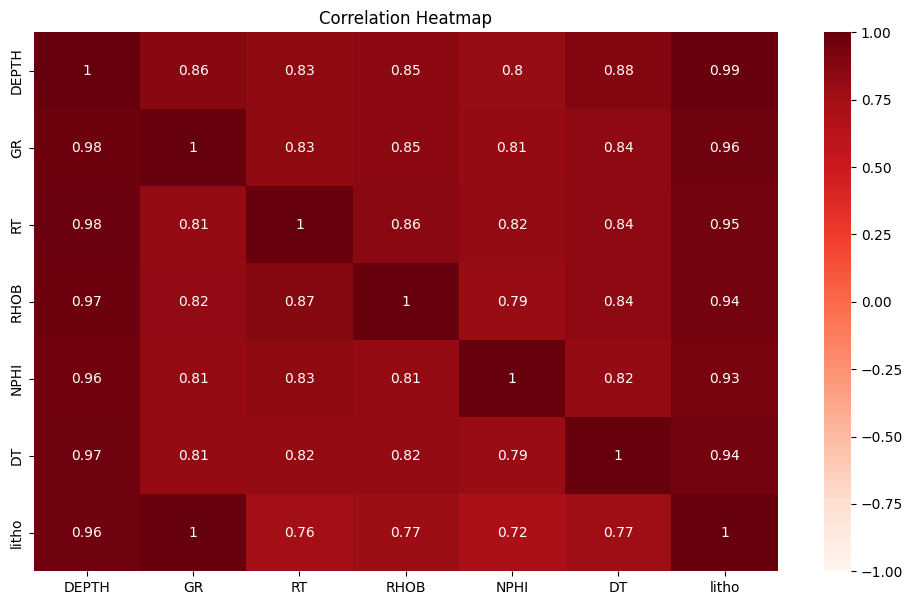

In [30]:
#Plots the heat map of Correlation Matrix
corr = Correlation(well5)
v = corr.corr(method='chatterjee')
corr.plot_heatmap(cmap='Reds')

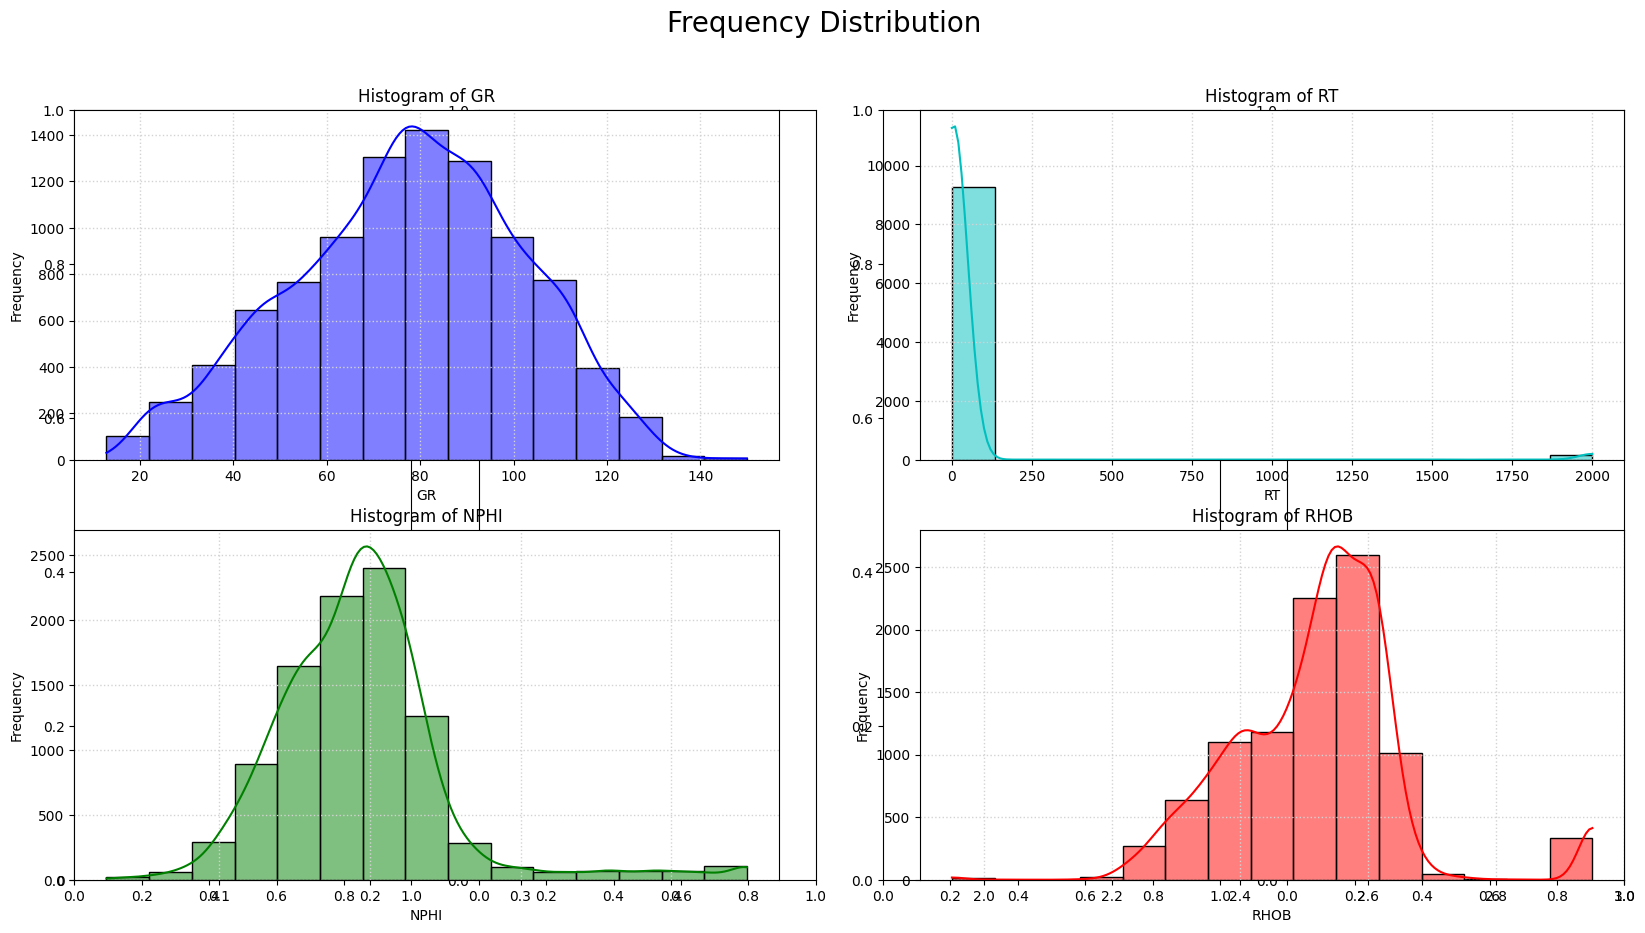

In [31]:
from petrolib.stats import displayFreq
displayFreq(well5, 'GR', 'RT', 'NPHI', 'RHOB', bins=15, figsize=(20,10))

In [32]:
from petrolib.plots import Zonation
#contact_path = Path(r"C:\Users\USER\Desktop\REX LOGS\REX-02 Top.csv")
#zones = Zonation(well_data, path=contact_path)
zones = Zonation(well5, zones = [{'RES_A':[2607, 2684]}])

In [33]:
#get reservoir information by calling the Zonation object
#ztop = top ; zbot = base; zn = zonename ; fm = formation mids to place zone name in plot
ztop, zbot, zn, fm = zones()

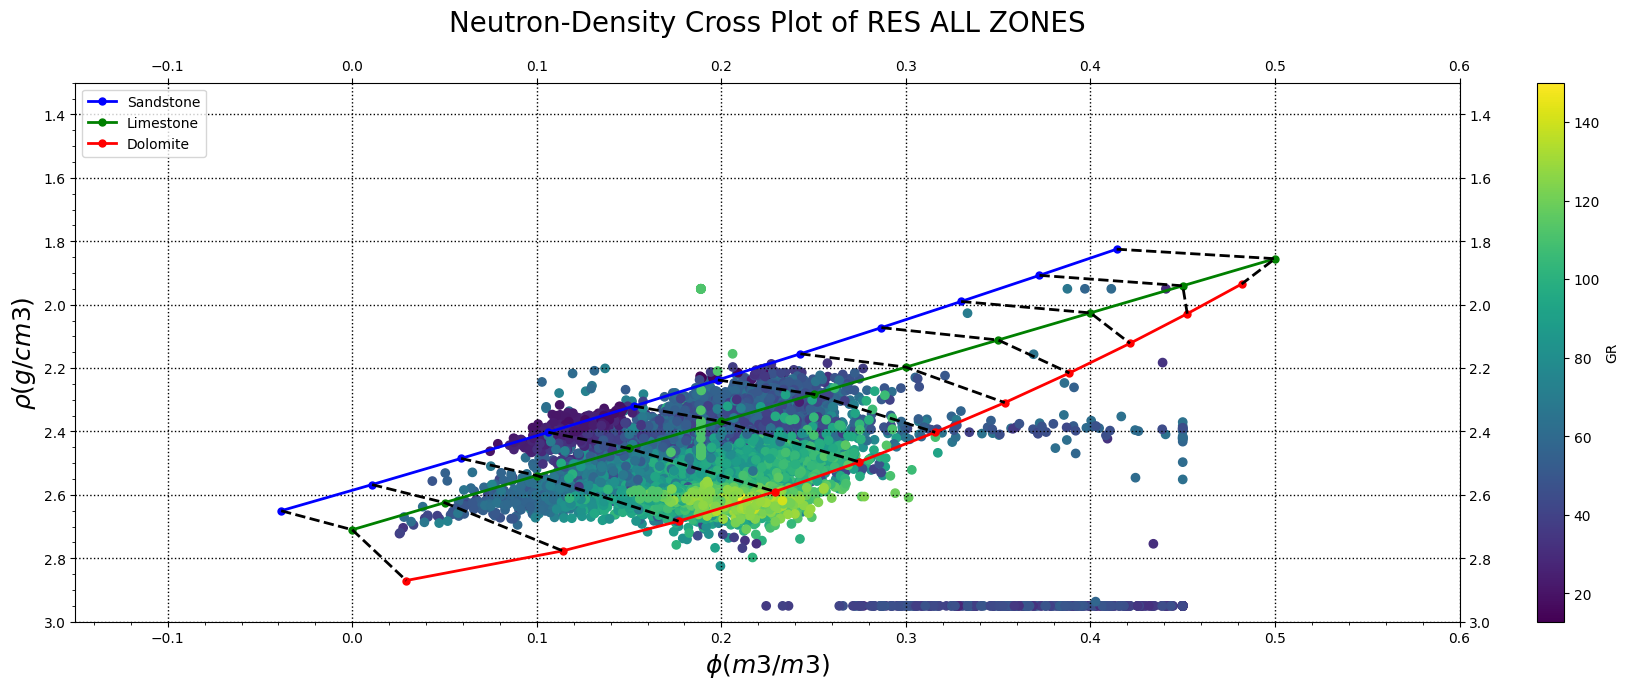

In [34]:
from petrolib.interp import crossPlot
crossPlot(well5, column_x='NPHI', column_y='RHOB', res_name='ALL ZONES', color_code='num', hue='GR')

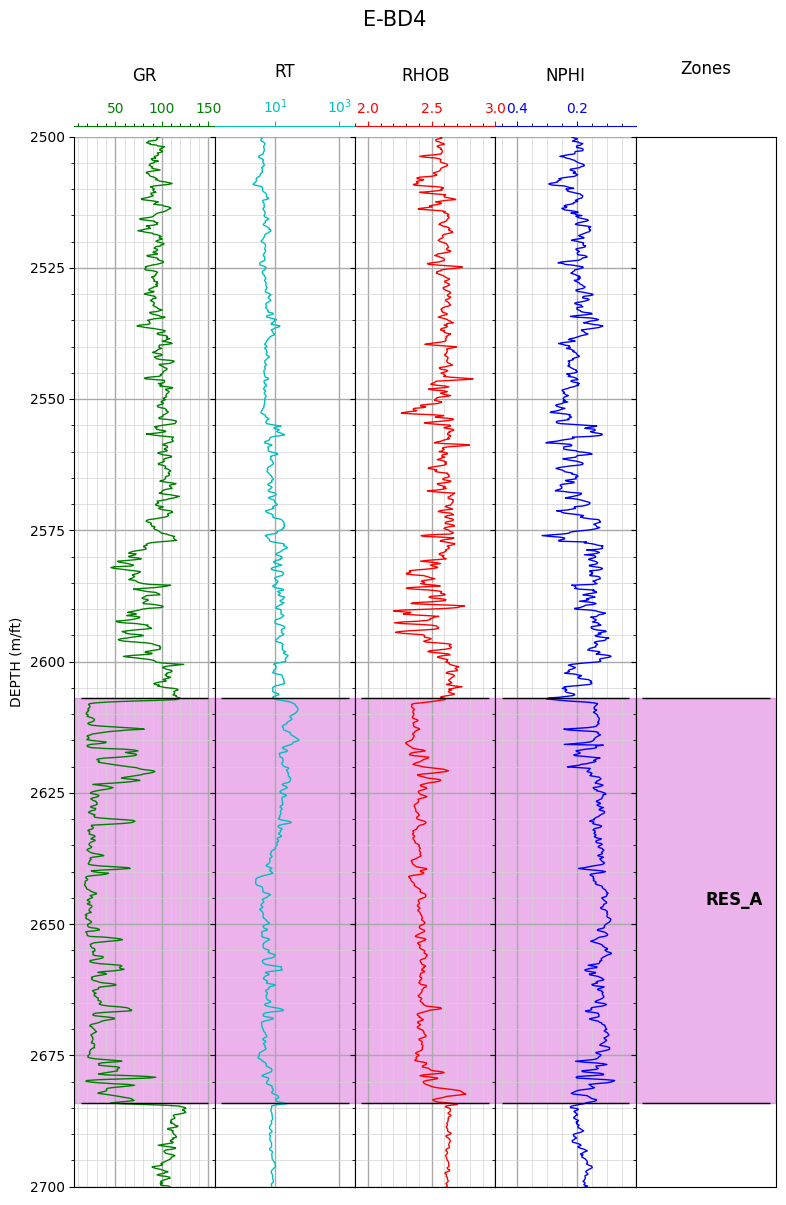

In [35]:
zones.plotZone('DEPTH', ['GR', 'RT', 'RHOB', 'NPHI'], 2500, 2700, 'E-BD4')

In [36]:
#creating quanti class
pp = Quanti(well5, zn, ztop, zbot, fm, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', use_mean=True)

In [37]:
# display data only
x = pp.vshale(method='clavier')
x = pd.concat(x)
print(x)

# display plot only
#pp.vshale(method='clavier', show_plot=True, palette_op='cubehelix', figsize=(9,12))

           DEPTH        GR       RT    RHOB    NPHI        DT      litho  \
17107  2607.1068  118.3412   9.4189  2.6084  0.3015  592.8595      Shale   
17108  2607.2592  115.3541  11.2092  2.6051  0.2760  586.8908      Shale   
17109  2607.4116   93.5584  15.9617  2.5556  0.2520  536.4934      Shale   
17110  2607.5640   64.4905  22.5230  2.5246  0.2171  559.7462  Sandstone   
17111  2607.7164   42.3467  30.4657  2.4752  0.1726  509.0459  Sandstone   
...          ...       ...      ...     ...     ...       ...        ...   
17607  2683.3068   67.8231  10.4690  2.5371  0.1469  285.3654  Sandstone   
17608  2683.4592   68.0666  10.1934  2.5084  0.1351  299.0778  Sandstone   
17609  2683.6116   70.2233  10.3860  2.5129  0.1353  302.9111  Sandstone   
17610  2683.7640   63.1673  11.1350  2.5251  0.1415  354.9362  Sandstone   
17611  2683.9164   53.8888  13.8567  2.5516  0.1548  337.4104  Sandstone   

         VShale  
17107  1.000000  
17108  0.932402  
17109  0.577222  
17110  0.281363

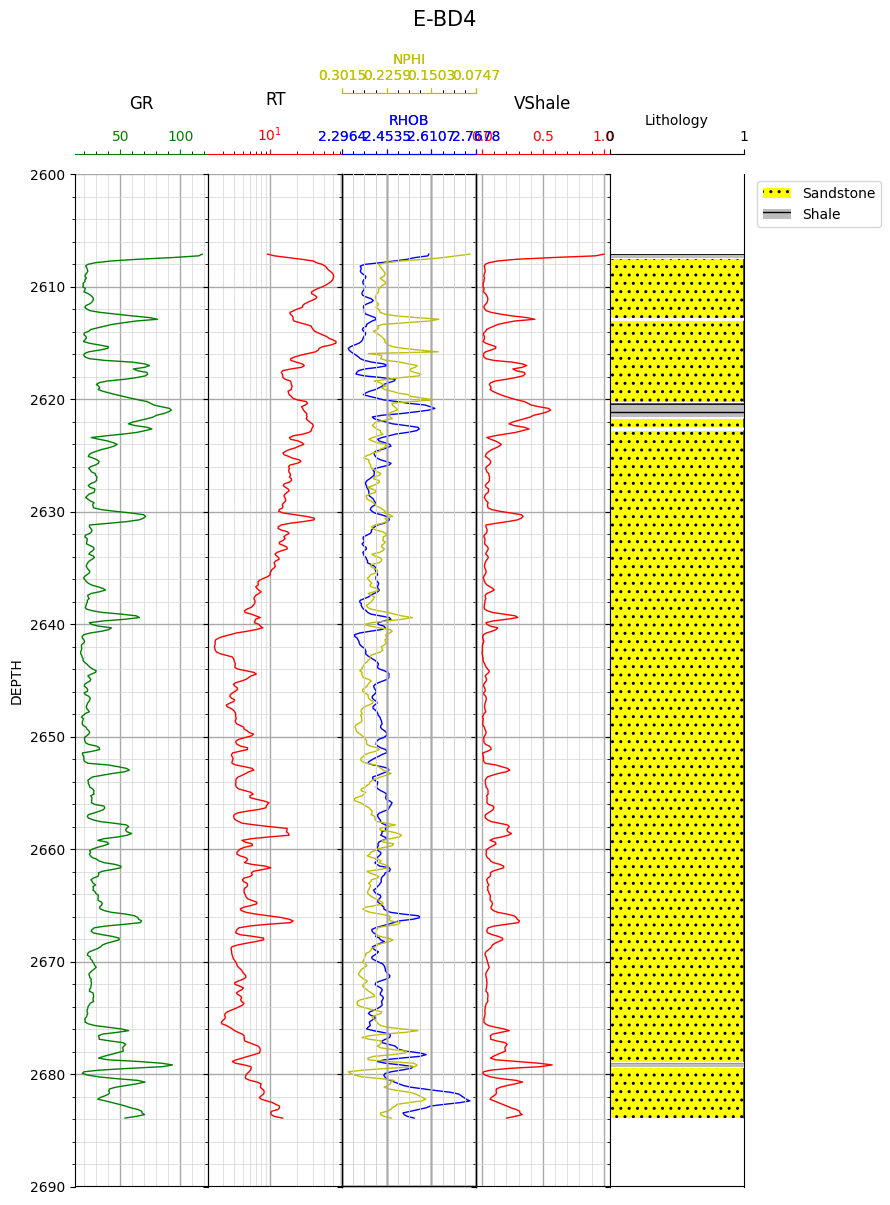

In [39]:
plotLogFacies(x, 'DEPTH', ['GR', 'RT', ['RHOB', 'NPHI'], 'VShale'], facies='litho', top=2600,
                        bottom=2690, figsize=(9, 12), title='E-BD4')

In [40]:
# display data only
y = pp.porosity(method='density')
x = pd.concat(y)
print(x)

# display plot only
#pp.porosity(method='density', show_plot=True, figsize=(10, 12))

           DEPTH        GR       RT    RHOB    NPHI        DT      litho  \
17107  2607.1068  118.3412   9.4189  2.6084  0.3015  592.8595      Shale   
17108  2607.2592  115.3541  11.2092  2.6051  0.2760  586.8908      Shale   
17109  2607.4116   93.5584  15.9617  2.5556  0.2520  536.4934      Shale   
17110  2607.5640   64.4905  22.5230  2.5246  0.2171  559.7462  Sandstone   
17111  2607.7164   42.3467  30.4657  2.4752  0.1726  509.0459  Sandstone   
...          ...       ...      ...     ...     ...       ...        ...   
17607  2683.3068   67.8231  10.4690  2.5371  0.1469  285.3654  Sandstone   
17608  2683.4592   68.0666  10.1934  2.5084  0.1351  299.0778  Sandstone   
17609  2683.6116   70.2233  10.3860  2.5129  0.1353  302.9111  Sandstone   
17610  2683.7640   63.1673  11.1350  2.5251  0.1415  354.9362  Sandstone   
17611  2683.9164   53.8888  13.8567  2.5516  0.1548  337.4104  Sandstone   

         VShale      PHIT      PHIE  
17107  1.000000  0.025212  0.000000  
17108  0.93

In [41]:
# display data only
z = pp.water_saturation(method='archie')
x = pd.concat(z)
print(x)

# display plot only
#pp.water_saturation(method='archie', show_plot=True, figsize=(10, 12))

           DEPTH        GR       RT    RHOB    NPHI        DT      litho  \
17107  2607.1068  118.3412   9.4189  2.6084  0.3015  592.8595      Shale   
17108  2607.2592  115.3541  11.2092  2.6051  0.2760  586.8908      Shale   
17109  2607.4116   93.5584  15.9617  2.5556  0.2520  536.4934      Shale   
17110  2607.5640   64.4905  22.5230  2.5246  0.2171  559.7462  Sandstone   
17111  2607.7164   42.3467  30.4657  2.4752  0.1726  509.0459  Sandstone   
...          ...       ...      ...     ...     ...       ...        ...   
17607  2683.3068   67.8231  10.4690  2.5371  0.1469  285.3654  Sandstone   
17608  2683.4592   68.0666  10.1934  2.5084  0.1351  299.0778  Sandstone   
17609  2683.6116   70.2233  10.3860  2.5129  0.1353  302.9111  Sandstone   
17610  2683.7640   63.1673  11.1350  2.5251  0.1415  354.9362  Sandstone   
17611  2683.9164   53.8888  13.8567  2.5516  0.1548  337.4104  Sandstone   

         VShale      PHIT      PHIE        SW        SH  
17107  1.000000  0.025212  0.

In [42]:
# display data only
x = pp.vshale(method='clavier')
y = pp.porosity(method='density')
z = pp.water_saturation(method='archie')
a = pp.permeability()
x = pd.concat(a)
print(x)

# display plot only
#pp.vshale(method='clavier')
#pp.porosity(method='density')
#pp.water_saturation(method='archie')
#pp.permeability(show_plot=True, figsize=(9, 10))

           DEPTH        GR       RT    RHOB    NPHI        DT      litho  \
17107  2607.1068  118.3412   9.4189  2.6084  0.3015  592.8595      Shale   
17108  2607.2592  115.3541  11.2092  2.6051  0.2760  586.8908      Shale   
17109  2607.4116   93.5584  15.9617  2.5556  0.2520  536.4934      Shale   
17110  2607.5640   64.4905  22.5230  2.5246  0.2171  559.7462  Sandstone   
17111  2607.7164   42.3467  30.4657  2.4752  0.1726  509.0459  Sandstone   
...          ...       ...      ...     ...     ...       ...        ...   
17607  2683.3068   67.8231  10.4690  2.5371  0.1469  285.3654  Sandstone   
17608  2683.4592   68.0666  10.1934  2.5084  0.1351  299.0778  Sandstone   
17609  2683.6116   70.2233  10.3860  2.5129  0.1353  302.9111  Sandstone   
17610  2683.7640   63.1673  11.1350  2.5251  0.1415  354.9362  Sandstone   
17611  2683.9164   53.8888  13.8567  2.5516  0.1548  337.4104  Sandstone   

         VShale      PHIT      PHIE        SW        SH        Perm  
17107  1.000000  

x.to_csv('E-BD4_Result.csv', index=False)

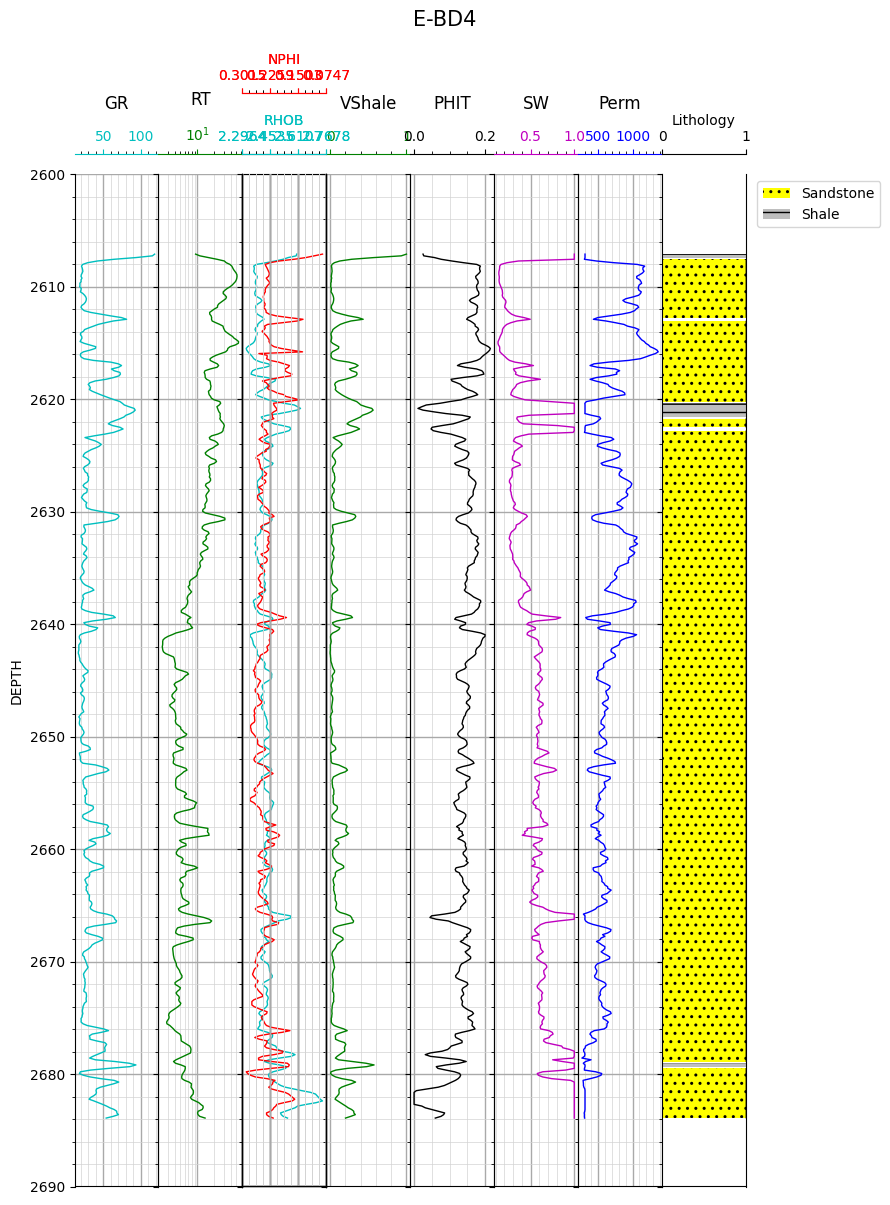

In [44]:
plotLogFacies(x, 'DEPTH', ['GR', 'RT', ['RHOB', 'NPHI'], 'VShale', 'PHIT', 'SW', 'Perm'], facies='litho', top=2600,
                        bottom=2690, figsize=(9, 12), title='E-BD4')

In [45]:
# Display data only
y = pp.flags(por_cutoff=.12, vsh_cutoff=.5, sw_cutoff=0.8)
x = pd.concat(y)
print(x)

# Display plot only
#pp.flags(por_cutoff=.12, vsh_cutoff=.5, sw_cutoff=0.8, show_plot=True, palette_op='cubehelix', figsize=(20, 15))

           DEPTH        GR       RT    RHOB    NPHI        DT      litho  \
17107  2607.1068  118.3412   9.4189  2.6084  0.3015  592.8595      Shale   
17108  2607.2592  115.3541  11.2092  2.6051  0.2760  586.8908      Shale   
17109  2607.4116   93.5584  15.9617  2.5556  0.2520  536.4934      Shale   
17110  2607.5640   64.4905  22.5230  2.5246  0.2171  559.7462  Sandstone   
17111  2607.7164   42.3467  30.4657  2.4752  0.1726  509.0459  Sandstone   
...          ...       ...      ...     ...     ...       ...        ...   
17607  2683.3068   67.8231  10.4690  2.5371  0.1469  285.3654  Sandstone   
17608  2683.4592   68.0666  10.1934  2.5084  0.1351  299.0778  Sandstone   
17609  2683.6116   70.2233  10.3860  2.5129  0.1353  302.9111  Sandstone   
17610  2683.7640   63.1673  11.1350  2.5251  0.1415  354.9362  Sandstone   
17611  2683.9164   53.8888  13.8567  2.5516  0.1548  337.4104  Sandstone   

         VShale      PHIT      PHIE        SW        SH        Perm  \
17107  1.000000 

In [46]:
pp.paySummary(name='E-BD4')

,Well,Zones,Flag Name,Top,Bottom,Unit,Gross,Net,Not Net,NTG,BVW,Average VShale,Average Porosity,Average Water Saturation
0,E-BD4,RES_A,ROCK,2607.106800,2683.916400,m,76.809600,57.949421,18.860179,0.754455,0.064317,0.043126,0.142369,0.480979
1,E-BD4,RES_A,RES,2607.106800,2683.916400,m,76.809600,57.949421,18.860179,0.754455,0.064317,0.043126,0.142369,0.480979
2,E-BD4,RES_A,PAY,2607.106800,2683.916400,m,76.809600,69.508886,7.300714,0.904950,0.061976,0.073973,0.135946,0.483829
